In [1]:
(use '[clojure.core.matrix]
     '[clojure.core.matrix.operators]
     '[clojure.core.matrix.stats]
     '[clojure.core.matrix.random]
     '[clojure.core.matrix.dataset]
     '[incanter.charts])

In [64]:
;; Input dataset
(def X (array [[0 0 0]
               [0 1 0]
               [0 0 1]
               [1 0 0]
               [1 1 1]
               [0 1 1]
               [1 0 1]]))

;; output dataset
(def y (transpose (array [[0 0 0 0 1 1 1]])))

;; initialize weights randomly with mean 0
;; with seed 1 ( just a good practice )
(def syn0 (- (* 2 (sample-uniform [3 4] 1)) 1))
(def syn1 (- (* 2 (sample-uniform [4 1] 1)) 1))

#'user/syn1

In [3]:
(defn nonlin
  ([x] (nonlin x false))
  ([x deriv] (if deriv
              (* x (- 1 x))
              (/ 1 (+ 1 (exp (- x)))))))

#'user/nonlin

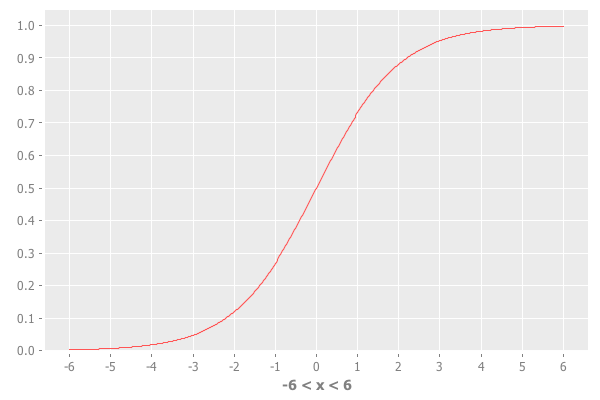

In [4]:
(-> (function-plot #(nonlin %) -6 6 :y-label "")
    (.createBufferedImage 600 400))

In [5]:
(defn forward
  [syn1 syn0]
  (let [l0 X
        l1 (nonlin (dot l0 syn0))
        l2 (nonlin (dot l1 syn1))

        l2_error (- y l2)
        l2_delta (* l2_error (nonlin l2 true))

        l1_error (dot l2_delta (transpose syn1))
        l1_delta (* l1_error (nonlin l1 true))]
      [(+ syn1 (dot (transpose l1) l2_delta))
       (+ syn0 (dot (transpose l0) l1_delta))
       l2_delta]))

#'user/forward

In [11]:
(defn train
  []
  (loop [param [syn1 syn0 nil]
         cnt 10001]
      (when (== (mod cnt 1000) 0)
        (println (format "%f" (get (array (mean (abs (get param 2)))) 0))))
      (if (== cnt 0)
       (do
         (println "done")
         [(first param) (second param)])
       (recur
         (forward (first param) (second param))
         (dec cnt)))))

#'user/train

In [65]:
(def result(train))
(def syn1 (get result 0))
(def syn0 (get result 1))

0.118539
0.000724
0.000299
0.000184
0.000131
0.000102
0.000082
0.000069
0.000060
0.000052
0.000046
done


#'user/syn0

In [13]:
syn1

[[6.551562804589703] [-6.078854715590265] [-1.9225214968424706] [1.4609194597448858]]

In [14]:
syn0

[[3.8699060202945867 -3.389408015130955 -1.695093330478042 0.6713930116540721] [3.890152774168595 -3.580747919455712 -0.4399355132363052 1.7014982953452538] [-1.8480350245672243 1.6451265855142336 0.36819244620437014 -0.6078713365732339]]

In [45]:
(defn nn 
    [query]
    (let [l1 (nonlin (dot query syn0))
          l2 (nonlin (dot l1 syn1))]
        (if (> 0.49 (first l2)) 0 1)))

#'user/nn

In [66]:
(nn [0 0 0])

0

In [69]:
(nn [0 0 1])

0

In [70]:
(nn [1 0 1])

1

In [71]:
(nn [1 1 1])

1